In [2]:
!unzip -d data data/初赛测试集.zip
!unzip -d data data/初赛训练集.zip

Archive:  data/初赛测试集.zip
   creating: data/�??�?�?�?�??/
  inflating: data/�??�?�?�?�??/.DS_Store  
   creating: data/�??�?�?�?�??/nwp_data_test/
  inflating: data/�??�?�?�?�??/nwp_data_test/.DS_Store  
   creating: data/�??�?�?�?�??/nwp_data_test/9/
   creating: data/�??�?�?�?�??/nwp_data_test/7/
   creating: data/�??�?�?�?�??/nwp_data_test/6/
   creating: data/�??�?�?�?�??/nwp_data_test/1/
   creating: data/�??�?�?�?�??/nwp_data_test/10/
   creating: data/�??�?�?�?�??/nwp_data_test/8/
   creating: data/�??�?�?�?�??/nwp_data_test/4/
   creating: data/�??�?�?�?�??/nwp_data_test/3/
   creating: data/�??�?�?�?�??/nwp_data_test/2/
   creating: data/�??�?�?�?�??/nwp_data_test/5/
   creating: data/�??�?�?�?�??/nwp_data_test/9/NWP_1/
   creating: data/�??�?�?�?�??/nwp_data_test/9/NWP_3/
   creating: data/�??�?�?�?�??/nwp_data_test/9/NWP_2/
   creating: data/�??�?�?�?�??/nwp_data_test/7/NWP_1/
   creating: data/�??�?�?�?�??/nwp_data_test/7/NWP_3/
   creating: data/�??�?�?�?�??/nwp_data_test/7

In [2]:
%pip install numpy==2.2.4 pandas==2.2.3 netCDF4==1.7.2 lightgbm==4.6.0 scikit-learn==1.6.1

Note: you may need to restart the kernel to use updated packages.


In [3]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd

nc_path = "data/初赛训练集/nwp_data_train/1/NWP_1/20240101.nc"
dataset = Dataset(nc_path, mode='r')
dataset.variables.keys()


dict_keys(['time', 'channel', 'data', 'lat', 'lon', 'lead_time'])

In [4]:
channel = dataset.variables["channel"][:]
channel

array(['ghi', 'poai', 'sp', 't2m', 'tcc', 'tp', 'u100', 'v100'],
      dtype=object)

In [5]:
data = dataset.variables["data"][:]
data.shape

(1, 24, 8, 11, 11)

In [6]:
time = dataset.variables["time"][:]
time


masked_array(data=[0],
             mask=False,
       fill_value=999999)

In [7]:
lead_time = dataset.variables["lead_time"][:]
lead_time

masked_array(data=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
                   14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
             mask=False,
       fill_value=999999)

In [8]:
mean_values = np.array([np.mean(data[:, :, i, :, :][0], axis=(1, 2)) for i in range(8)]).T
mean_values.shape

(24, 8)

In [9]:
df_day = pd.DataFrame(mean_values, columns=channel)
df_day

,ghi,poai,sp,t2m,tcc,tp,u100,v100
0,0.000000,0.000000,101482.256521,291.638451,0.516120,9.773191e-07,-7.086032,0.512215
1,0.000000,0.000000,101473.772082,291.526163,0.809191,1.670900e-06,-6.885034,0.250697
2,0.000000,0.000000,101422.160059,291.422615,0.842704,3.436380e-06,-6.758892,0.149917
3,0.000000,0.000000,101373.420132,291.328372,0.700878,5.706283e-06,-6.746323,0.049512
4,0.000000,0.000000,101306.028571,291.097804,0.336712,7.251077e-06,-6.686253,-0.190427
5,0.000000,0.000000,101277.858858,290.885161,0.296355,7.787027e-06,-6.736977,-0.598130
6,0.000000,0.000000,101307.903796,290.680049,0.309797,8.354502e-06,-6.920897,-0.648821
7,0.000000,0.000000,101371.027925,290.539262,0.433669,1.027761e-05,-6.931151,-0.347130
8,82.490574,97.406741,101432.194667,291.062591,0.503870,1.235836e-05,-6.992746,-0.206490
9,232.673325,270.404278,101484.576543,292.080544,0.496889,1.809617e-05,-7.418341,0.104216


In [10]:
date_range = pd.date_range(start='2024-01-01', end='2024-12-30')
date = [date.strftime('%Y%m%d') for date in date_range]
date[:5]

['20240101', '20240102', '20240103', '20240104', '20240105']

In [11]:
def get_data(path_template, date):
    # Load the dataset for a specific date 读取该天数据
    dataset = Dataset(path_template.format(date), mode='r')
    # Extract the relevant column variables 获取列名
    channel = dataset.variables["channel"][:]
    # Extract the data variable 获取列名对应的数据
    data = dataset.variables["data"][:]
    mean_values = np.array([np.mean(data[:, :, i, :, :][0], axis=(1, 2)) for i in range(8)]).T
    # Create a DataFrame with the mean values and channel names 将数据与列名整合为DataFrame
    return pd.DataFrame(mean_values, columns=channel)

train_path_template = "data/初赛训练集/nwp_data_train/1/NWP_1/{}.nc"
data = [get_data(train_path_template, i) for i in date]
train = pd.concat(data, axis=0).reset_index(drop=True)
train.shape

(8760, 8)

In [22]:
target = pd.read_csv("data/初赛训练集/fact_data/1_normalization_train.csv")
target = target[96:]
# 功率数据中每四条数据去掉三条
target = target[target['时间'].str.endswith('00:00')]
target = target.reset_index(drop=True)
target.head()
# train["power"] = target["功率(MW)"]

,时间,功率(MW)
0,2024-01-02 00:00:00,0.141008
1,2024-01-02 01:00:00,0.196198
2,2024-01-02 02:00:00,0.254960
3,2024-01-02 03:00:00,0.194558
4,2024-01-02 04:00:00,0.172464


Matplotlib is building the font cache; this may take a moment.


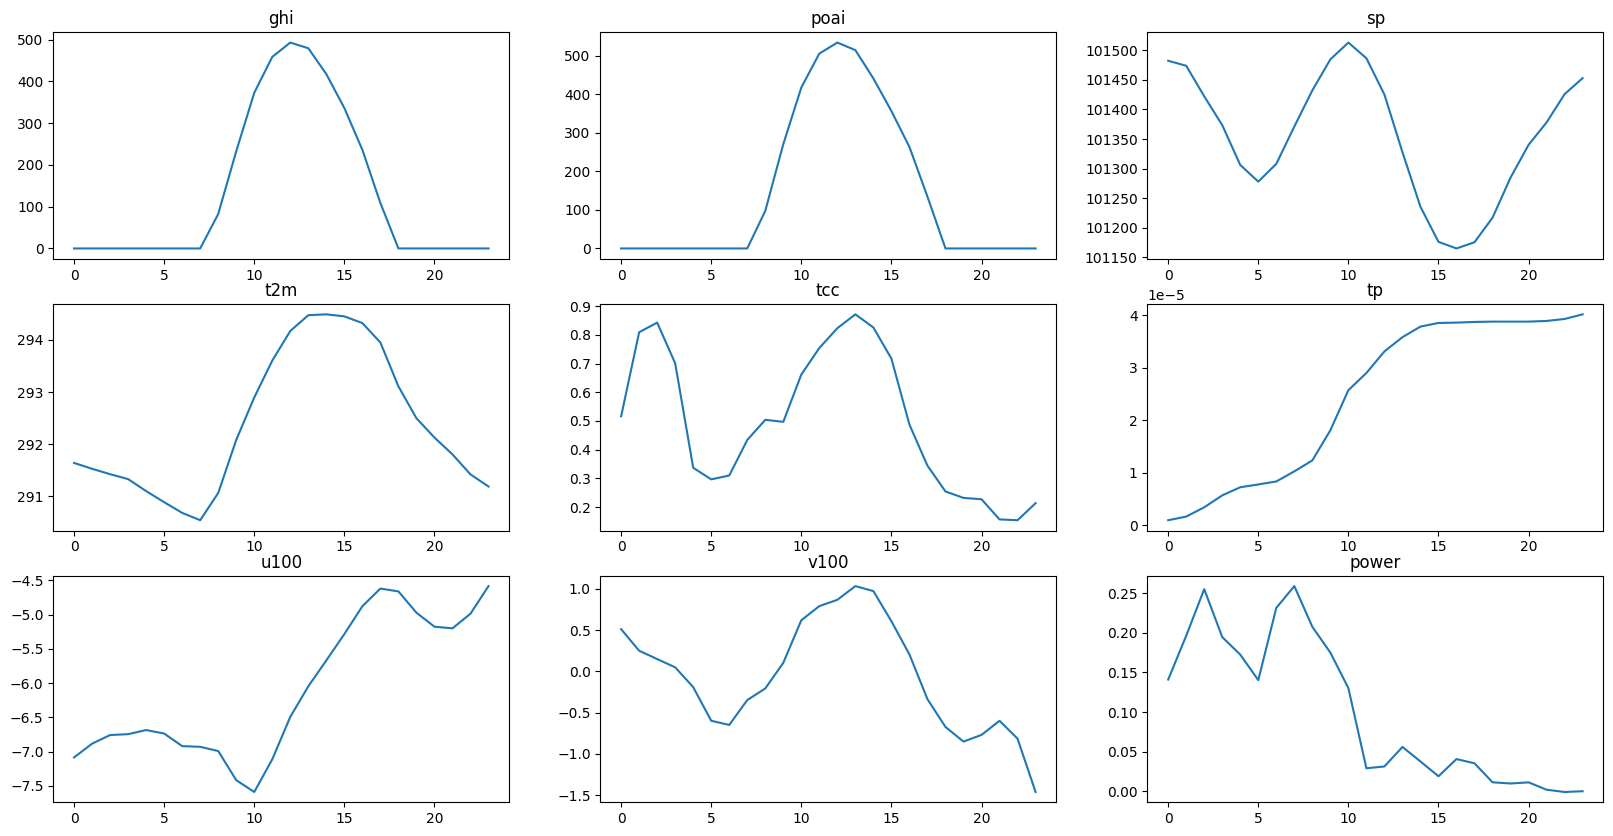

In [ ]:
import matplotlib.pyplot as plt
# 获取24小时的列表
hours = range(24)
# 定义画布
plt.figure(figsize=(20,10))
# 绘制八个特征及目标值
for i in range(9):
    # 绘制3*3的图中第i+1子图
    plt.subplot(3, 3, i+1)
    # 横坐标为小时 纵坐标为特征or目标值
    plt.plot(hours, train.iloc[:24, i])
    # title为列名
    plt.title(train.columns.tolist()[i])
# 展示图片
plt.show()
test_path_template = "data/初赛测试集/nwp_data_test/1/NWP_1/{}.nc"

date_range = pd.date_range(start='2024-12-31', end='2025-02-27')
date = [date.strftime('%Y%m%d') for date in date_range]
date[:5]

In [15]:
def feature_combine(df):
    df_copy = df.copy()
    df_copy["wind_speed"] = np.sqrt(df_copy["u100"]**2 + df_copy["v100"]**2)
    df_copy["h"] = df_copy.index % 24
    return df_copy
train = feature_combine(train)

In [23]:
test_path_template = "data/初赛测试集/nwp_data_test/1/NWP_1/{}.nc"
date_range = pd.date_range(start='2024-12-31', end='2025-02-27')
date = [date.strftime('%Y%m%d') for date in date_range]
date[:5]
data = [get_data(test_path_template, i) for i in date]
test = pd.concat(data, axis=0).reset_index(drop=True)
test.shape
# test = feature_combine(test)

(1416, 8)

In [ ]:
# data = [get_data(test_path_template, i) for i in date]
# test = pd.concat(data, axis=0).reset_index(drop=True)
# test.shape

(1416, 8)

In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb



def cv_model(clf, train_x, train_y, test_x, seed):
    # 5折交叉验证
    folds = 5
    kf = KFold(n_splits=folds, shuffle=True, random_state=seed)
    oof = np.zeros(train_x.shape[0])
    test_predict = np.zeros(test_x.shape[0])
    cv_scores = []
    
    for i, (train_index, valid_index) in enumerate(kf.split(train_x, train_y)):
        print('************************************ {} ************************************'.format(str(i+1)))
        trn_x, trn_y, val_x, val_y = train_x.iloc[train_index], train_y[train_index], train_x.iloc[valid_index], train_y[valid_index]
        
        train_matrix = clf.Dataset(trn_x, label=trn_y)
        valid_matrix = clf.Dataset(val_x, label=val_y)
        params = {
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': 'rmse',
            'min_child_weight': 5,
            'num_leaves': 2**8,
            'lambda_l2': 10,
            'feature_fraction': 0.8,
            'bagging_fraction': 0.8,
            'bagging_freq': 4,
            'learning_rate': 0.1,
            'nthread' : 16,
            'verbose' : -1,
            'early_stopping_rounds': 200,
            'seed': seed
        }
        model = clf.train(params, train_matrix, 3000, valid_sets=[train_matrix, valid_matrix])
        val_pred = model.predict(val_x, num_iteration=model.best_iteration, predict_disable_shape_check=True)
        test_pred = model.predict(test_x, num_iteration=model.best_iteration, predict_disable_shape_check=True)
        
        oof[valid_index] = val_pred
        # 将每个模型结果加权并相加
        test_predict += test_pred / kf.n_splits
        
        score = 1/(1+np.sqrt(mean_squared_error(val_pred, val_y)))
        cv_scores.append(score)
        print(cv_scores)
            
    return oof, test_predict
seed = np.random.randint(0, 10000)

lgb_oof, lgb_test = cv_model(lgb, train, target['功率(MW)'], test, seed)
# 将数据重复4次
lgb_test = [item for item in lgb_test for _ in range(4)]

************************************ 1 ************************************
[0.9957451227162784]
************************************ 2 ************************************
[0.9957451227162784, 0.9954299642757249]
************************************ 3 ************************************
[0.9957451227162784, 0.9954299642757249, 0.9955608302917889]
************************************ 4 ************************************
[0.9957451227162784, 0.9954299642757249, 0.9955608302917889, 0.9952944077477528]
************************************ 5 ************************************
[0.9957451227162784, 0.9954299642757249, 0.9955608302917889, 0.9952944077477528, 0.9948822081510076]


In [30]:
import os
if not os.path.exists("output"):
    os.makedirs("output")
output = pd.read_csv("data/output1.csv").reset_index(drop=True)
output["power"] = lgb_test
output.rename(columns={'Unnamed: 0': ''}, inplace=True)
output.set_index(output.iloc[:, 0], inplace=True)
output = output.drop(columns=["0", ""])
for i in range(1, 11):
    output.to_csv('output/output'+ str(i) + '.csv')

In [31]:
!zip -r output.zip output

  adding: output/ (stored 0%)
  adding: output/output8.csv (deflated 85%)
  adding: output/output9.csv (deflated 85%)
  adding: output/output1.csv (deflated 85%)
  adding: output/output10.csv (deflated 85%)
  adding: output/output2.csv (deflated 85%)
  adding: output/output3.csv (deflated 85%)
  adding: output/output7.csv (deflated 85%)
  adding: output/output6.csv (deflated 85%)
  adding: output/output4.csv (deflated 85%)
  adding: output/output5.csv (deflated 85%)
